In [1]:
import cobra
import numpy as np
from cobra import *
import os
import matplotlib.pyplot as plt

In [2]:
ecpy_path = '../../../ecpy/'
sys.path.append(os.path.abspath(ecpy_path))
import utils
import ecpy

In [3]:
import importlib
importlib.reload(utils)

<module 'utils' from '/Users/gangl/Documents/GitHub/Halo-GEM/ecpy/utils.py'>

#### 1. Test the effect of glucose uptake
NGAM = 6.86

Using license file /Users/gangl/gurobi.lic
Academic license - for non-commercial use only
NGAM: 6.86
(<Solution 0.139 at 0x1320c6fd68>, <Solution 16.401 at 0x1320c84668>)


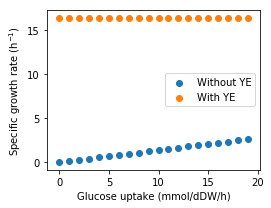

In [4]:
halo_model = cobra.io.load_json_model('../../../ModelFiles/json/Halo_GEM_v1.2.json')
print('NGAM:',halo_model.reactions.NGAM.lower_bound)
print(utils.test_biomass_production(halo_model))
utils.test_glucose(halo_model)
del halo_model

#### 2. test the effect of NGAM
Fix glucose uptake rate as 10.0

(<Solution 1.388 at 0x132078dac8>, <Solution 16.401 at 0x13207949b0>)


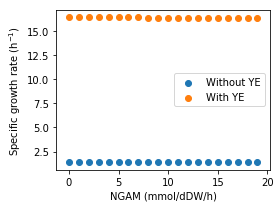

In [5]:
halo_model = cobra.io.load_json_model('../../../ModelFiles/json/Halo_GEM_v1.2.json')
utils.set_bound(halo_model,'Exchange_Glucopyranose',ub=10.0)
print(utils.test_biomass_production(halo_model))
utils.test_NGAM(halo_model)
del halo_model

#### 3. block ATPSyntase

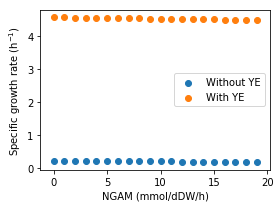

In [6]:
halo_model = cobra.io.load_json_model('../../../ModelFiles/json/Halo_GEM_v1.2.json')
utils.set_bound(halo_model,'Exchange_Glucopyranose',ub=10.0)
utils.test_biomass_production(halo_model)
utils.set_bound(halo_model,'ATPSYN-RXN',lb=0,ub=0) 
utils.test_NGAM(halo_model)
del halo_model

#### 4. PHA production

(<Solution 1.388 at 0x1320e10a20>, <Solution 16.351 at 0x1320e32278>)


cobra/util/solver.py:416 UserWarning: solver status is 'infeasible'


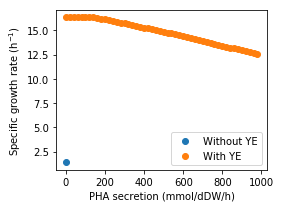

In [7]:
halo_model = cobra.io.load_json_model('../../../ModelFiles/json/Halo_GEM_v1.1.json')
utils.set_bound(halo_model,'Exchange_Glucopyranose',ub=10.0)
print(utils.test_biomass_production(halo_model))
utils.test_PHB(halo_model)
del halo_model

(<Solution 1.388 at 0x132200cb38>, <Solution 16.401 at 0x132200c0f0>)


cobra/util/solver.py:416 UserWarning: solver status is 'infeasible'


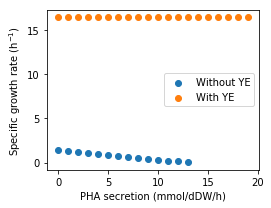

In [8]:
halo_model = cobra.io.load_json_model('../../../ModelFiles/json/Halo_GEM_v1.2.json')
utils.set_bound(halo_model,'Exchange_Glucopyranose',ub=10.0)
print(utils.test_biomass_production(halo_model))
utils.test_PHB(halo_model,ys=np.arange(0,20))
del halo_model

#### 5. Test ATP production 

NGAM: 6.86
(<Solution 0.139 at 0x13235a80b8>, <Solution 16.401 at 0x13235a0860>)
NGAM: 0
(<Solution 0.139 at 0x13235a8780>, <Solution 16.433 at 0x13235a0550>)
[[0.0, 333.3333333333332], [0.7659574468085084, 333.3333333333334], [1.5319148936170168, 333.3333333333334], [2.2978723404255246, 333.3333333333334], [3.0638297872340337, 333.3333333333334], [3.829787234042537, 333.3333333333334], [4.595744680851049, 333.3333333333334], [5.361702127659593, 333.3333333333334], [6.127659574468067, 333.3333333333334], [6.893617021276599, 333.3333333333334], [7.659574468085074, 333.3333333333334], [8.425531914893599, 333.3333333333334], [9.191489361702098, 333.3333333333334], [9.957446808510634, 333.3333333333334], [10.723404255319187, 333.3333333333334], [11.489361702127704, 333.3333333333334], [12.255319148936135, 333.3333333333334], [13.021276595744666, 333.3333333333334], [13.787234042553198, 333.3333333333334], [14.553191489361758, 333.3333333333334]]


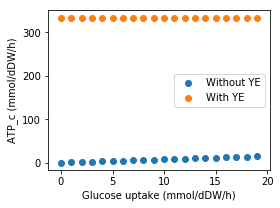

In [9]:
halo_model = cobra.io.load_json_model('../../../ModelFiles/json/Halo_GEM_v1.2.json')

print('NGAM:',halo_model.reactions.NGAM.lower_bound)
print(utils.test_biomass_production(halo_model))

utils.set_bound(halo_model,'NGAM',eq=0)
print('NGAM:',halo_model.reactions.NGAM.lower_bound)
print(utils.test_biomass_production(halo_model))

utils.test_Glc_to_ATP(halo_model)
del halo_model

#### Test NGAM maximization

(<Solution 0.139 at 0x1324f2d128>, <Solution 16.401 at 0x1324f25940>)
[[500.0, 1000.0], [503.0, 1000.0], [506.0, 1000.0], [509.0, 1000.0], [512.0, 1000.0], [515.0, 1000.0], [518.0, 1000.0], [521.0, 1000.0], [524.0, 1000.0], [527.0, 1000.0], [530.0, 1000.0], [533.0, 1000.0], [536.0, 1000.0], [539.0, 1000.0], [542.0, 1000.0], [545.0, 1000.0], [548.0, 1000.0], [551.0, 1000.0], [554.0, 1000.0], [557.0, 1000.0]]


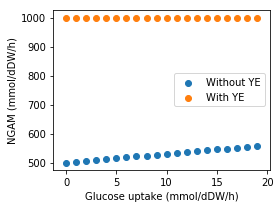

In [10]:
halo_model = cobra.io.load_json_model('../../../ModelFiles/json/Halo_GEM_v1.2.json')
print(utils.test_biomass_production(halo_model))
utils.test_Glc_to_NGAM(halo_model)
del halo_model

(<Solution 0.139 at 0x1324cae160>, <Solution 16.401 at 0x1324c97fd0>)
[[0.0, 1000.0], [3.0, 1000.0], [6.0, 1000.0], [9.0, 1000.0], [12.0, 1000.0], [15.000000000000341, 1000.0], [17.999999999999318, 1000.0], [21.000000000000455, 1000.0], [23.999999999999773, 1000.0], [27.000000000000114, 1000.0], [30.0, 1000.0], [33.0, 1000.0], [36.0, 1000.0], [39.0, 1000.0], [42.0, 1000.0], [45.0, 1000.0], [48.0, 1000.0], [50.999999999999886, 1000.0], [54.0, 1000.0], [57.0, 1000.0]]


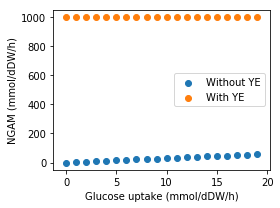

In [11]:
halo_model = cobra.io.load_json_model('../../../ModelFiles/json/Halo_GEM_v1.2.json')
print(utils.test_biomass_production(halo_model))
utils.set_bound(halo_model,'ATPSYN-RXN',lb=0,ub=0) 
utils.test_Glc_to_NGAM(halo_model)
del halo_model

#### Test case in ecoli model

In [12]:
eco_model = cobra.io.read_sbml_model('../../../ComplementaryData/iML1515.xml')

[0.0, 23.50000000000003, 47.00000000000005, 70.50000000000009, 94.0000000000001, 117.5000000000001, 141.00000000000017, 164.50000000000017, 188.0000000000002, 211.5000000000002, 235.0000000000002, 258.50000000000034, 282.00000000000034, 305.5000000000003, 329.00000000000034, 352.5000000000004, 376.0000000000004, 399.5000000000003, 423.0000000000004, 446.5000000000007]


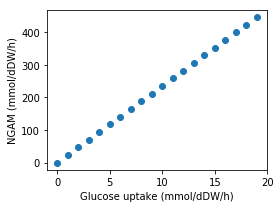

In [13]:
utils.test_Glc_to_NGAM_ecoli(eco_model)

[0.0, 0.5191897654584202, 1.0383795309168404, 1.5575692963752656, 2.076759061833681, 2.595948827292115, 3.1151385927505313, 3.6343283582089616, 4.153518123667362, 4.672707889125785, 5.19189765458423, 5.711087420042645, 6.230277185501063, 6.749466950959519, 7.268656716417923, 7.78784648187635, 8.307036247334723, 8.826226012793192, 9.34541577825157, 9.864605543710047]


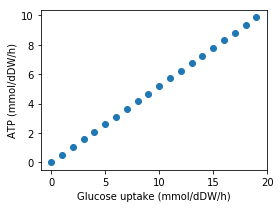

In [14]:
utils.test_Glc_to_ATP_ecoli(eco_model)

#### Research NGAM

In [101]:
halo_model = cobra.io.load_json_model('../../../ModelFiles/json/Halo_GEM_v1.2.json')

In [102]:
eco_rxns = utils.metacyc_id_indexed_ecoli_rxns(eco_model)

In [103]:
utils.set_yeast_extraction(halo_model,lb=0,ub=0)
utils.set_bound(halo_model,'Exchange_Glucopyranose',ub=0)
utils.set_bound(halo_model,'NGAM',lb=-1000,ub=1000)
#utils.set_bound(halo_model,'ATPSYN-RXN',lb=0,ub=0) 

#utils.set_bound(halo_model,'TRANS-RXN-122A',lb=0) # based on iML1515 model
#utils.set_bound(halo_model,'TRANS-RXN0-281',lb=-1000) # based on iML1515 model
#utils.set_bound(halo_model,'TRANS-RXN-121',lb=0) # based on iML1515 model
#utils.set_bound(halo_model,'TRANS-RXN-349',lb=0,ub=0) # break the loop
#utils.set_bound(halo_model,'TRANS-RXN0-281',lb=0,ub=0) # break the loop
#utils.set_bound(halo_model,'TRANS-RXN-162',lb=0,ub=0) # break the loop
#utils.set_bound(halo_model,'FUMt1pp',lb=0,ub=0) # break the loop
#utils.set_bound(halo_model,'NADH18pp',lb=0,ub=0) # break the loop, too many missing genes
#utils.set_bound(halo_model,'NADH17pp',lb=0,ub=0) # break the loop, too many missing genes
#utils.set_bound(halo_model,'RXN0-5111',lb=0,ub=0) # break the loop


halo_model.objective = 'NGAM'
halo_model.objective_direction = 'max'
s1 = halo_model.optimize()
#s1 = cobra.flux_analysis.pfba(halo_model)

In [104]:
s1

,fluxes,reduced_costs
RXN-6021,0.0,0.0
DEOXYRIBOSE-P-ALD-RXN,0.0,0.0
FEENTERabcpp,0.0,0.0
DHBSZ3FEabcpp,0.0,0.0
ABC-3-RXN,0.0,-1.0
...,...,...
NAD-SYNTH-NH3-RXN,0.0,-2.0
DM_CPD-15815_p,0.0,0.0
PHA_synthetase,0.0,-2.0
PHA_secretion,0.0,0.0


In [105]:
for rxn in halo_model.reactions:
    if np.abs(s1[rxn.id])!=0 :
        print(rxn.id,s1[rxn.id])
        print(rxn.reaction,rxn.gene_reaction_rule)
        try: 
            print(eco_rxns[rxn.id].reaction,eco_rxns[rxn.id].lower_bound,eco_rxns[rxn.id].upper_bound)
        except: 
            try: print(eco_model.reactions.get_by_id(rxn.id).reaction)
            except:pass

        print()

INORGPYROPHOSPHAT-RXN 500.0
CPD-15815_c + PPI_c --> 2.0 CPD-16459_c + PROTON_c TD01GL002927 or TD01GL000541 or TD01GL002040
h2o_c + ppi_c --> h_c + 2.0 pi_c 0.0 1000.0

ACACt2pp -1000.0
3-KETOBUTYRATE_p + PROTON_p <=> 3-KETOBUTYRATE_c + PROTON_c TD01GL003146
acac_p + h_p <=> acac_c + h_c

ATPSYN-RXN 1000.0
ADP_c + CPD-16459_c + 4.0 PROTON_p <=> ATP_c + CPD-15815_c + 3.0 PROTON_c TD01GL003778 and TD01GL003779 and TD01GL003780 and TD01GL003781 and TD01GL003782 and TD01GL003783 and TD01GL003784 and TD01GL003785
adp_c + 4.0 h_p + pi_c <=> atp_c + h2o_c + 3.0 h_c -1000.0 1000.0

TRANS-RXN-29 -1000.0
PROTON_p + PRO_p <=> PROTON_c + PRO_c TD01GL000618
h_p + pro__L_p <=> h_c + pro__L_c -1000.0 1000.0

TRANS-RXN-118 1000.0
NA+_p + PRO_p --> NA+_c + PRO_c TD01GL001348 or TD01GL001350
na1_p + pro__L_p --> na1_c + pro__L_c 0.0 1000.0

ASPtpp 500.0
L-ASPARTATE_p <=> L-ASPARTATE_c TD01GL002946
asp__L_p <=> asp__L_c

GSDEADENYLATION-RXN 500.0
Glutamine-synthetase-adenylyl-Tyr_c + Pi_c --> ADP_c + Glu

In [68]:
for rxn in halo_model.metabolites.get_by_id('WATER_c').reactions: print(rxn.reaction)

WATER_p <=> WATER_c


In [21]:
for rxn in halo_model.metabolites.get_by_id('FE+3_p').reactions:print(rxn.reaction,rxn.gene_reaction_rule)

4.0 FE+2_p + OXYGEN-MOLECULE_p + 4.0 PROTON_p --> 2.0 CPD-15815_p + 4.0 FE+3_p TD01GL000596
FE+3_e <=> FE+3_p 
ATP_c + CPD-15815_c + FE+3_p --> ADP_c + CPD-16459_c + FE+3_c + PROTON_c 


In [22]:
 halo_model.metabolites.get_by_id('K+_p')

Metabolite identifier,K+_p
Name,Potassium
Memory address,0x01326310438
Formula,K
Compartment,p
In 4 reaction(s),"TRANS-RXN-2, ExchangeEP_K+, TRANS-RXN-3, TRANS-RXN-42"


In [23]:
!less ../../../ComplementaryData/chem_xref.tsv|grep MNXM95|grep 'metacyc:K'

metacyc:K+	MNXM95	identity	K+|potassium|potassium ion


In [24]:
eco_model.metabolites.get_by_id('k_p').annotation

{'bigg.metabolite': 'k',
 'biocyc': 'META:KCL',
 'chebi': ['CHEBI:26219', 'CHEBI:29103', 'CHEBI:49685', 'CHEBI:8345'],
 'hmdb': 'HMDB00586',
 'kegg.compound': ['C00238', 'C12568'],
 'kegg.drug': ['D01168', 'D08403'],
 'metanetx.chemical': 'MNXM95',
 'seed.compound': 'cpd00205'}

In [25]:
eco_model.metabolites.fe3_p

Metabolite identifier,fe3_p
Name,Iron (Fe3+)
Memory address,0x01326879358
Formula,Fe
Compartment,p
In 3 reaction(s),"FE3tex, FE3abcpp, FEROpp"


In [26]:
eco_model.reactions.ATPM.reaction

'atp_c + h2o_c --> adp_c + h_c + pi_c'

#### Rearch NGAM coli model

In [27]:
eco_model = cobra.io.read_sbml_model('../../../ComplementaryData/iML1515.xml')

In [28]:
eco_model.reactions.EX_glc__D_e.lower_bound = -1

eco_model.reactions.ATPM.lower_bound = 0
eco_model.objective = 'ATPM'

eco_model.objective_direction = 'max'
s2 = eco_model.optimize()

In [29]:
s2

,fluxes,reduced_costs
ALATA_D2,0.0,-1.500000e+00
SHCHD2,0.0,-5.500000e+00
CPPPGO,0.0,0.000000e+00
GTHOr,0.0,-7.105427e-15
DHORD5,0.0,0.000000e+00
...,...,...
SUCCt1pp,0.0,0.000000e+00
QUINDH,0.0,0.000000e+00
LCARSyi,0.0,0.000000e+00
BIOMASS_Ec_iML1515_core_75p37M,0.0,-3.175835e+02


In [30]:
for rxn in eco_model.reactions:
    if s2[rxn.id]!=0: #and eco_model.metabolites.h_c in rxn.metabolites:
        print(rxn.id,s2[rxn.id])
        print(rxn.reaction)
        print()

CS 1.9999999999999998
accoa_c + h2o_c + oaa_c --> cit_c + coa_c + h_c

ICDHyr 1.9999999999999998
icit_c + nadp_c <=> akg_c + co2_c + nadph_c

ENO 1.9999999999999996
2pg_c <=> h2o_c + pep_c

FBA 1.0
fdp_c <=> dhap_c + g3p_c

PGI 1.0
g6p_c <=> f6p_c

PGK -1.9999999999999996
3pg_c + atp_c <=> 13dpg_c + adp_c

EX_co2_e 5.999999999999999
co2_e <=> 

EX_glc__D_e -1.0
glc__D_e <=> 

MDH 1.9999999999999998
mal__L_c + nad_c <=> h_c + nadh_c + oaa_c

FUM 1.9999999999999998
fum_c + h2o_c <=> mal__L_c

NDPK4 -0.9999999999999998
atp_c + dtdp_c <=> adp_c + dttp_c

NADTRHD 1.9999999999999998
nad_c + nadph_c --> nadh_c + nadp_c

AKGDH 1.9999999999999998
akg_c + coa_c + nad_c --> co2_c + nadh_c + succoa_c

GAPD 1.9999999999999996
g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c

H2Otex -6.000000000000002
h2o_e <=> h2o_p

O2tpp 5.999999999999999
o2_p <=> o2_c

CO2tpp -5.999999999999999
co2_p <=> co2_c

ATPS4rpp 19.499999999999996
adp_c + 4.0 h_p + pi_c <=> atp_c + h2o_c + 3.0 h_c

O2tex 5.999999999999999

In [31]:
eco2halo = {v.id:k for k,v in eco_rxns.items()}

In [32]:
for rxn in eco_model.metabolites.h_c.reactions:
    if not eco_model.metabolites.h_c in rxn.metabolites: continue
    #if not eco_model.metabolites.nad_c in rxn.metabolites: continue
    #if not eco_model.metabolites.nadp_c in rxn.metabolites: continue
    if s2[rxn.id] == 0: continue
    print(rxn.id,s2[rxn.id])
    print(rxn.reaction)
    
    try:
        print(halo_model.reactions.get_by_id(eco2halo[rxn.id]).reaction)
    except: pass
    print(rxn.annotation)
    print()

NADH16pp 9.999999999999998
4.0 h_c + nadh_c + q8_c --> 3.0 h_p + nad_c + q8h2_c
{'sbo': 'SBO:0000375', 'bigg.reaction': 'NADH16pp', 'ec-code': '1.6.5.3', 'metanetx.reaction': 'MNXR101864'}

PYK6 0.9999999999999998
dtdp_c + h_c + pep_c --> dttp_c + pyr_c
{'sbo': 'SBO:0000375', 'bigg.reaction': 'PYK6'}

GAPD 1.9999999999999996
g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c
GAP_c + NAD_c + Pi_c <=> DPG_c + NADH_c + PROTON_c
{'sbo': 'SBO:0000375', 'bigg.reaction': 'GAPD', 'biocyc': 'META:GAPOXNPHOSPHN-RXN', 'ec-code': ['1.2.1.12', '1.2.1.59'], 'kegg.reaction': 'R01061', 'metanetx.reaction': 'MNXR100040', 'rhea': ['10300', '10301', '10302', '10303']}

ATPM 23.499999999999993
atp_c + h2o_c --> adp_c + h_c + pi_c
{'sbo': 'SBO:0000630', 'bigg.reaction': 'ATPM', 'biocyc': 'META:ATPASE-RXN', 'ec-code': ['3.6.1.15', '3.6.1.3', '3.6.1.5', '3.6.1.8', '3.6.3.1', '3.6.3.10', '3.6.3.11', '3.6.3.12', '3.6.3.14', '3.6.3.15', '3.6.3.16', '3.6.3.17', '3.6.3.18', '3.6.3.19', '3.6.3.2', '3.6.3.20', '3.6.3.

In [100]:
for rxn in eco_model.metabolites.h_p.reactions:
    print(rxn.reaction,rxn.lower_bound,rxn.upper_bound)

h2o_p + udcpdp_p --> h_p + pi_p + udcpp_p 0.0 1000.0
h2o_p + pe161_p --> 2agpe161_p + h_p + hdcea_p 0.0 1000.0
4.0 h_c + 0.5 o2_c + q8h2_c --> h2o_c + 4.0 h_p + q8_c 0.0 1000.0
1agpg141_p + h2o_p --> g3pg_p + h_p + ttdcea_p 0.0 1000.0
3.0 h_p + tartr__D_p --> 3.0 h_c + tartr__D_c 0.0 1000.0
asn__L_p + h_p <=> asn__L_c + h_c -1000.0 1000.0
enter_c + h_p --> enter_p + h_c 0.0 1000.0
h_p + pacald_p <=> h_c + pacald_c -1000.0 1000.0
4.0 fe2_p + 4.0 h_p + o2_p --> 4.0 fe3_p + 2.0 h2o_p 0.0 1000.0
h_p + lys__L_p --> h_c + lys__L_c 0.0 1000.0
gal_p + h_p --> gal_c + h_c 0.0 1000.0
cholate_c + h_p --> cholate_p + h_c 0.0 1000.0
h_p + ura_p --> h_c + ura_c 0.0 1000.0
h_p + hg2_c --> h_c + hg2_p 0.0 1000.0
enter_p + h_p --> enter_e + h_c 0.0 1000.0
dgsn_p + h_p --> dgsn_c + h_c 0.0 1000.0
h2o_p + pe180_p --> 2agpe180_p + h_p + ocdca_p 0.0 1000.0
gly_p + h_p --> gly_c + h_c 0.0 1000.0
duri_p + h_p --> duri_c + h_c 0.0 1000.0
atp_c + coa_c + h_p + ocdca_p --> amp_c + h_c + ppi_c + stcoa_c 0.0 1000

In [106]:
eco_model.compartments

{'c': 'cytosol', 'e': 'extracellular space', 'p': 'periplasm'}